In [1]:
import setup
import excel_sheet_functions as ex
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
env = setup.create_environment()
tanks = setup.create_tanks()
motor = setup.create_motor()
rocket = setup.create_rocket()
test_flight = setup.create_flight(rocket=rocket, env=env)

Fetching elevation from open-elevation.com for lat=35.35, lon=-117.81...
Elevation received: 621.0 m


c:\Users\krikb\Desktop\Pulpit\agh_space_systems\simulations\.venv\Lib\site-packages\rocketpy\environment\tools.py:309: UserWarning: Exact chosen launch time is not available in the provided file, using 2026-02-14 15:00:00 UTC instead.
  warnings.warn(


In [ ]:
#Rail Departure Velocity

# 1. Get SI Value from RocketPy
v_m_s = test_flight.out_of_rail_velocity

# 2. Convert to Imperial (ft/s)
v_ft_s = v_m_s * 3.28084

# 3. Get the exact time of rail exit
t_exit = test_flight.out_of_rail_time

print(f"Rail Departure Velocity (SI): {v_m_s:.2f} m/s")
print(f"Rail Departure Velocity (Imp): {v_ft_s:.2f} ft/s")
print(f"Time of Rail Exit: {t_exit:.3f} s")

In [ ]:
ex.rail_departure_velocity_in_ft_per_sec(test_flight)

In [ ]:
#Average TWR Calculation (Rail Phase)

t_exit = test_flight.out_of_rail_time 
g = 9.80665  # SI gravity 

#  100 sample points between 0 and t_exit 
rail_times = np.linspace(1, t_exit, 100)

# 3. Calculate Average Thrust 
thrust_values = [motor.thrust(t) for t in rail_times]
avg_thrust = np.mean(thrust_values)

# 4. Calculate Average Mass during rail phase
propellant_mass_values = [motor.propellant_mass(t) for t in rail_times]
total_mass_values = [rocket.mass + motor.propellant_mass(t) for t in rail_times]
avg_propellant_mass = np.mean(propellant_mass_values)
avg_total_mass = rocket.mass + avg_propellant_mass # rocket.mass is dry mass

# 5. Calculate TWR
twr_rail_avg = avg_thrust / (avg_total_mass * g)

# --- OUTPUT ---
print(f"Time on Rail: {t_exit:.4f} s")
print(f"Average Thrust (Rail Phase): {avg_thrust:.2f} N")
print(f"Average Total Mass (Rail Phase): {avg_total_mass:.2f} kg")
print(f"---------------------------------------------------")
print(f"TWR (Rail Phase Average): {twr_rail_avg:.4f}")

In [ ]:
ex.average_thrust_during_rail_phase(test_flight, motor, rocket)

In [ ]:
# static margin
test_flight.static_margin
nd_static_margin = np.array(test_flight.static_margin)
print(nd_static_margin[:, 1])
max_static_margin = np.max(nd_static_margin[:,1])
min_static_margin = np.min(nd_static_margin[:,1])
print(f"Max Static Margin: {max_static_margin:.4f}")
print(f"Min Static Margin: {min_static_margin:.4f}")

In [ ]:
ex.max_static_margin(test_flight)
ex.min_static_margin(test_flight)

In [ ]:
# max acceleration, speed, number of mach, dynamic pressure
max_acceleration = test_flight.max_acceleration
max_speed = test_flight.max_speed
max_mach = test_flight.max_mach_number
max_dynamic_pressure = test_flight.max_dynamic_pressure
max_acceleration_time = test_flight.max_acceleration_time
max_speed_time = test_flight.max_speed_time
max_dynamic_pressure_time = test_flight.max_dynamic_pressure_time
altitude_at_max_pressure = test_flight.z(max_dynamic_pressure_time)
max_altitude = test_flight.apogee
max_altitude_time = test_flight.apogee_time
print(f"Maximum Acceleration: {max_acceleration:.2f} m/s^2")
print(f"Maximum Speed: {max_speed:.2f} m/s")
print(f"Maximum Mach Number: {max_mach:.2f}")
print(f"Maximum Dynamic Pressure: {max_dynamic_pressure:.2f} Pa")
print(f"Time of Maximum Acceleration: {max_acceleration_time:.2f} s")
print(f"Time of Maximum Speed: {max_speed_time:.2f} s")
print(f"Time of Maximum Dynamic Pressure: {max_dynamic_pressure_time:.2f} s")
print(f"Altitude at Maximum Dynamic Pressure: {altitude_at_max_pressure:.2f} m")
print(f"Maximum Altitude: {max_altitude:.2f} m")
print(f"Time of Maximum Altitude: {max_altitude_time:.2f} s")

In [ ]:
# max acceleration, speed, number of mach, dynamic pressure
max_acceleration = test_flight.max_acceleration
max_speed = test_flight.max_speed
max_mach = test_flight.max_mach_number
max_dynamic_pressure = test_flight.max_dynamic_pressure
max_acceleration_time = test_flight.max_acceleration_time
max_speed_time = test_flight.max_speed_time
max_dynamic_pressure_time = test_flight.max_dynamic_pressure_time
altitude_at_max_pressure = test_flight.z(max_dynamic_pressure_time)
max_altitude = test_flight.apogee
max_altitude_time = test_flight.apogee_time
print(f"Maximum Acceleration: {max_acceleration:.2f} m/s^2")
print(f"Maximum Speed: {max_speed:.2f} m/s")
print(f"Maximum Mach Number: {max_mach:.2f}")
print(f"Maximum Dynamic Pressure: {max_dynamic_pressure:.2f} Pa")
print(f"Time of Maximum Acceleration: {max_acceleration_time:.2f} s")
print(f"Time of Maximum Speed: {max_speed_time:.2f} s")
print(f"Time of Maximum Dynamic Pressure: {max_dynamic_pressure_time:.2f} s")
print(f"Altitude at Maximum Dynamic Pressure: {altitude_at_max_pressure:.2f} m")
print(f"Maximum Altitude: {max_altitude:.2f} m")
print(f"Time of Maximum Altitude: {max_altitude_time:.2f} s")

In [ ]:
# converting to imperial
max_acceleration_ft_s2 = max_acceleration * 3.28084
max_speed_ft_s = max_speed * 3.28084
max_dynamic_pressure_psf = max_dynamic_pressure * 0.0208854342
altitude_at_max_pressure_ft = altitude_at_max_pressure * 3.28084
max_altitude_ft = max_altitude * 3.28084
print(f"Maximum Acceleration: {max_acceleration_ft_s2:.2f} fts^2")
print(f"Maximum Speed: {max_speed_ft_s:.2f} ft/s")
print(f"Maximum Dynamic Pressure: {max_dynamic_pressure_psf:.2f} psf")
print(f"Altitude at Maximum Dynamic Pressure: {altitude_at_max_pressure_ft:.2f} ft")
print(f"Maximum Altitude: {max_altitude_ft:.2f} ft")

In [3]:
max_a, max_a_time = ex.max_acceleration(test_flight)
max_v, max_v_time = ex.max_speed(test_flight)
max_q, max_q_time, altitude_at_max_q = ex.max_dynamic_pressure(test_flight)
max_mach = ex.max_mach(test_flight)
max_a_in_g, max_a_time = ex.max_acceleration_in_g(test_flight)
max_v_in_ft_s, max_v_time = ex.max_velocity_in_ft_per_sec(test_flight)
max_q_in_psi, max_q_time, altitude_at_max_q_ft = ex.max_q_in_psi_and_altitude_in_ft(test_flight)
print(f"Maximum Acceleration: {max_a:.2f} m/s^2 at {max_a_time:.2f} s")
print(f"Maximum Speed: {max_v:.2f} m/s at {max_v_time:.2f} s")      
print(f"Maximum Dynamic Pressure: {max_q:.2f} Pa at {max_q_time:.2f} s, Altitude: {altitude_at_max_q:.2f} m")
print(f"Maximum Mach Number: {max_mach:.2f}")
print(f"Maximum Acceleration in g: {max_a_in_g:.2f} g at {max_a_time:.2f} s")
print(f"Maximum Velocity: {max_v_in_ft_s:.2f} ft/s at {max_v_time:.2f} s")
print(f"Maximum Dynamic Pressure in psi: {max_q_in_psi:.2f} psi at {max_q_time:.2f} s, Altitude: {altitude_at_max_q_ft:.2f} ft")


Maximum Acceleration: 65.64 m/s^2 at 165.94 s
Maximum Speed: 298.18 m/s at 11.41 s
Maximum Dynamic Pressure: 41652.37 Pa at 11.35 s, Altitude: 2605.06 m
Maximum Mach Number: 0.90
Maximum Acceleration in g: 6.69 g at 165.94 s
Maximum Velocity: 978.27 ft/s at 11.41 s
Maximum Dynamic Pressure in psi: 6.04 psi at 11.35 s, Altitude: 8546.79 ft


Distance from Pad: 1291.98 m


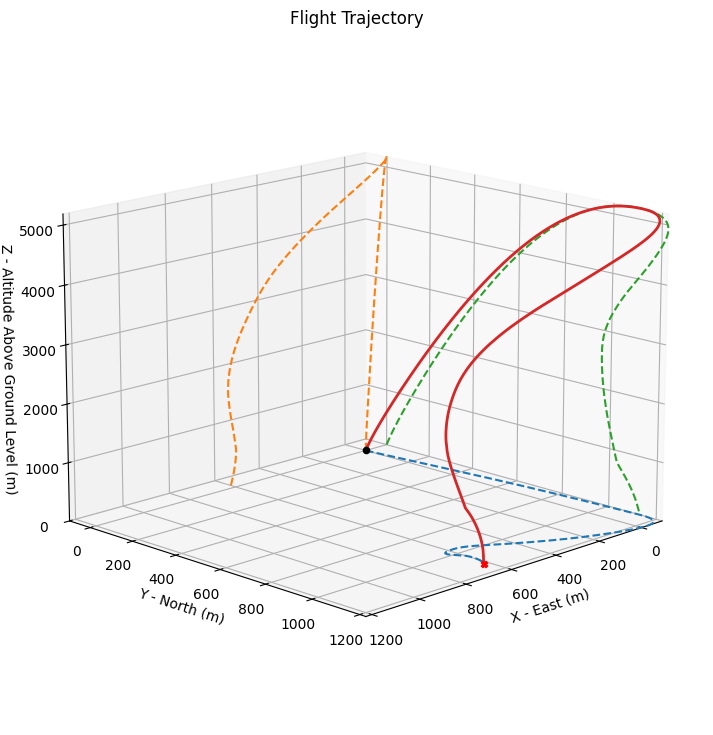

In [7]:
#max disntance from the pad
x_impact = test_flight.x_impact
y_impact = test_flight.y_impact
distance_from_pad = np.sqrt(x_impact**2 + y_impact**2)
print(f"Distance from Pad: {distance_from_pad:.2f} m")
test_flight.plots.trajectory_3d()

In [ ]:
ex.distance_from_pad(test_flight)

In [5]:
# pitch/yaw moments
# Aerodynamic moments in body frame (N⋅m)
M1 = test_flight.M1      # Roll moment
M2 = test_flight.M2      # Pitch moment
M3 = test_flight.M3      # Yaw moment
M1_array = np.array(M1)
M2_array = np.array(M2)
M3_array = np.array(M3)
M1_column = M1_array[:, 1] 
M2_column = M2_array[:, 1]
M3_column = M3_array[:, 1]
M1_max = M1_column.max()
M2_max = M2_column.max()
M3_max = M3_column.max()
M1_max_time = M1_array[M1_column.argmax(), 0]
M2_max_time = M2_array[M2_column.argmax(), 0]
M3_max_time = M3_array[M3_column.argmax(), 0]
print(f"Max roll moment: {M1_max} N⋅m")
print(f"Max pitch moment: {M2_max} N⋅m")
print(f"Max yaw moment: {M3_max} N⋅m") 
print(f"Time of max roll moment: {M1_max_time:.2f} s")
print(f"Time of max pitch moment: {M2_max_time:.2f} s")
print(f"Time of max yaw moment: {M3_max_time:.2f} s") 

Max roll moment: 7.672815514446434 N⋅m
Max pitch moment: 2.030478901945849 N⋅m
Max yaw moment: 1.3809848149247907e-13 N⋅m
Time of max roll moment: 4.02 s
Time of max pitch moment: 3.26 s
Time of max yaw moment: 14.05 s


In [ ]:
print(ex.max_yaw_moment(test_flight))
print(ex.max_pitch_moment(test_flight))

(np.float64(1.3809848149247907e-13), np.float64(14.048196618590367))
(np.float64(2.030478901945849), np.float64(3.2622480557919284))


In [ ]:
#data for plots, we convert rocketpy function to numpy array then pandas dataframe for better handling and visualization
mach_np = np.array(test_flight.mach_number)
mach_df = pd.DataFrame(mach_np, columns=['Time','Mach Number'])
mach_df.head()

,Time,Mach Number
0,0.000000,0.004383
1,0.600000,0.004383
2,0.750000,0.004383
3,0.900000,0.004383
4,0.903075,0.004383


In [43]:
# We need data for center of pressure, angle of attack, mach number, center of gravity, 
mach_np = np.array(test_flight.mach_number)
mach_df = pd.DataFrame(mach_np, columns=['Time','Mach Number'])
max_mach_number = test_flight.max_mach_number
cp = rocket.evaluate_center_of_pressure()
cp.savetxt('center_of_pressure.csv', lower=0, upper=max_mach_number, samples=1000)
cp_df = pd.read_csv('center_of_pressure.csv') # center of pressure dataframe

aoa = test_flight.angle_of_attack
aoa.savetxt('angle_of_attack.csv', samples=1000, encoding='utf-8')
aoa_df = pd.read_csv('angle_of_attack.csv') # angle of attack dataframe

cog = rocket.evaluate_center_of_mass()
cog.savetxt('center_of_gravity.csv', samples=1000)
cog_df = pd.read_csv('center_of_gravity.csv') # center of gravity dataframe

# there is just one issue cp is function of mach number

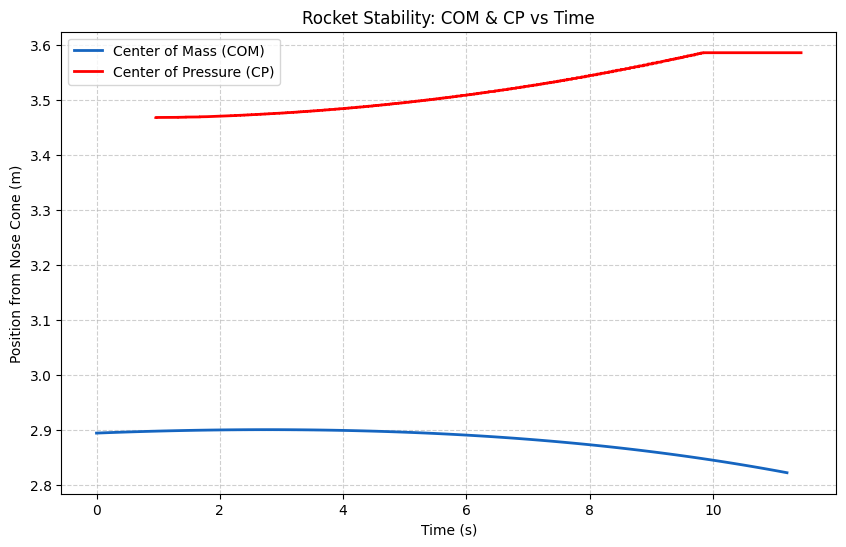

In [53]:
# Creating cp as a function of time dataframe
# first we have to get mach number dataframe, but only to the time of max mach number
max_mach_number_index = mach_df['Mach Number'].idxmax()
mach_to_max_df = mach_df.loc[:max_mach_number_index]
#mach_to_max_df.tail()

# then we are going to match mach number of cp to time at which it occurs
# 2. Rename columns for clarity
# cp_df 'x' is Mach
cp_df = cp_df.rename(columns={'x': 'Mach_Ref'}) 

# 3. SORTING IS MANDATORY for merge_asof
cp_df = cp_df.sort_values('Mach_Ref')
mach_to_max_df = mach_to_max_df.sort_values('Mach Number')

# 4. Perform the "Nearest" Match
# This looks for the closest 'Mach Number' in mach_to_max_df for every 'Mach_Ref' in cp_df
merged_df = pd.merge_asof(
    cp_df, 
    mach_to_max_df, 
    left_on='Mach_Ref', 
    right_on='Mach Number', 
    direction='nearest'
)

plt.figure(figsize=(10, 6))

# 1. Plot Center of Mass (Time is already x-axis here)
plt.plot(
    cog_df['Time (s)'], 
    cog_df['Center of Mass Position (m)'], 
    label='Center of Mass (COM)', 
    color='#1565c0',  # Blue
    linewidth=2
)

# 2. Plot Center of Pressure (Use flight time as x-axis)
plt.plot(
    merged_df['Time'], 
    merged_df['Scalar'], 
    label='Center of Pressure (CP)', 
    color='red', 
    linewidth=2
)

# Formatting
plt.title("Rocket Stability: COM & CP vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Position from Nose Cone (m)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Save or Show
#plt.savefig("stability_over_time.png", dpi=300)
plt.show()

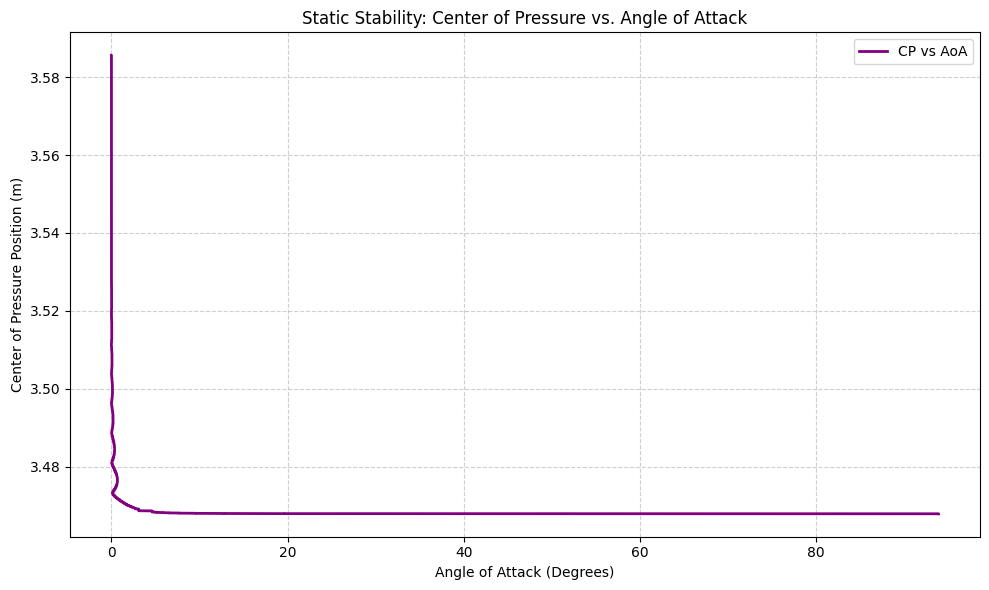

In [57]:
# --- NEW CODE STARTS HERE ---

# 1. Prepare the Dataframes
# Ensure both are sorted by Time for merge_asof
# Note: merged_df uses 'Time', aoa_df uses 'Time (s)' (standard RocketPy export)
merged_df = merged_df.sort_values('Time') 
aoa_df = aoa_df.sort_values('Time (s)')

# 2. Merge CP data with AoA data on Time
# We use merged_df as the base (since it's already filtered to max mach in your code)
cp_aoa_df = pd.merge_asof(
    merged_df, 
    aoa_df, 
    left_on='Time', 
    right_on='Time (s)', 
    direction='nearest'
)




# 4. Plotting
plt.figure(figsize=(10, 6))

plt.plot(
    cp_aoa_df['Angle of Attack (°)'], 
    cp_aoa_df['Scalar'],  # This is the CP position from merged_df
    color='purple',
    linewidth=2,
    label='CP vs AoA'
)

# Formatting
plt.title("Static Stability: Center of Pressure vs. Angle of Attack")
plt.xlabel("Angle of Attack (Degrees)")
plt.ylabel("Center of Pressure Position (m)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Optional: Invert X-axis if you want to see standard stability curve orientation
# plt.gca().invert_xaxis() 

plt.tight_layout()
plt.show()

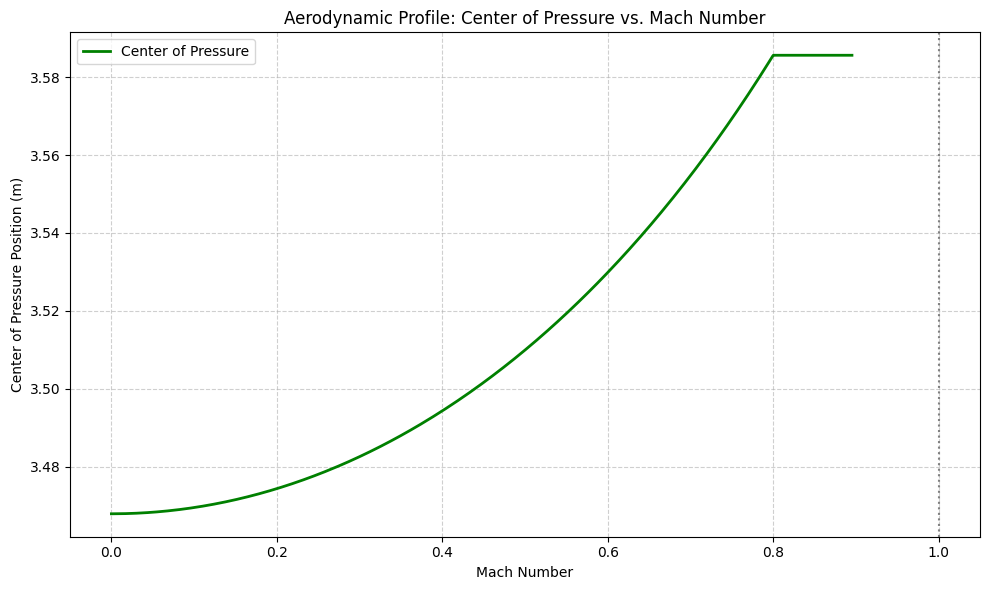

In [58]:
# 1. Prepare Data
# cp_df is already loaded in your previous code.
# Ensure it is sorted by Mach number for a clean line plot.
cp_df = cp_df.sort_values('Mach_Ref')

# 2. Plotting
plt.figure(figsize=(10, 6))

plt.plot(
    cp_df['Mach_Ref'], 
    cp_df['Scalar'], 
    label='Center of Pressure', 
    color='green', 
    linewidth=2
)

# 3. Formatting
plt.title("Aerodynamic Profile: Center of Pressure vs. Mach Number")
plt.xlabel("Mach Number")
plt.ylabel("Center of Pressure Position (m)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Optional: Add a vertical line for Mach 1 (Speed of Sound) to see transonic effects
plt.axvline(x=1.0, color='grey', linestyle=':', label='Mach 1.0')

plt.tight_layout()
plt.show()